In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
df = pd.read_csv("mushrooms.csv")


In [ ]:
X = df.drop("class", axis=1)
y = df["class"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm thử:", X_test.shape)


Kích thước tập huấn luyện: (5686, 22)
Kích thước tập kiểm thử: (2438, 22)


In [ ]:
target_column = "class"  # cột cần dự đoán
# Các thuộc tính bình thường (features)
X = df.drop(columns=[target_column])

# Thuộc tính quyết định (target)
y = df[target_column]


In [ ]:
print("Trần Quân Bảo - 6351071005")
print("Các cột thuộc tính bình thường (features):")
print(X.columns)

print("\nThuộc tính quyết định (target):")
print(y.name)


Trần Quân Bảo - 6351071005
Các cột thuộc tính bình thường (features):
Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Thuộc tính quyết định (target):
class


In [ ]:
print("Trần Quân Bảo - 6351071005")
categorical_cols = X.select_dtypes(include=['object']).columns
print("Các cột không phải số:", list(categorical_cols))
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Kích thước X trước one-hot encoding:", X.shape)
print("Kích thước X sau one-hot encoding:", X_encoded.shape)

# Xem vài dòng đầu tiên
print(X_encoded.head())


Trần Quân Bảo - 6351071005
Các cột không phải số: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
Kích thước X trước one-hot encoding: (8124, 22)
Kích thước X sau one-hot encoding: (8124, 95)
   cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0        False        False        False        False         True   
1        False        False        False        False         True   
2        False        False        False        False        False   
3        False        False        False        False         True   
4        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,   # 30% cho kiểm thử
    random_state=42  # để kết quả chia dữ liệu có thể tái lập
)
print("Trần Quân Bảo - 6351071005")
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm thử:", X_test.shape)


Trần Quân Bảo - 6351071005
Kích thước tập huấn luyện: (5686, 95)
Kích thước tập kiểm thử: (2438, 95)


Trần Quân Bảo - 6351071005


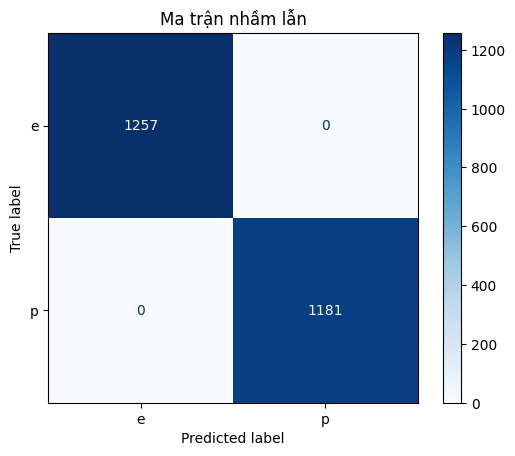

Độ chính xác trên tập kiểm thử: 1.0


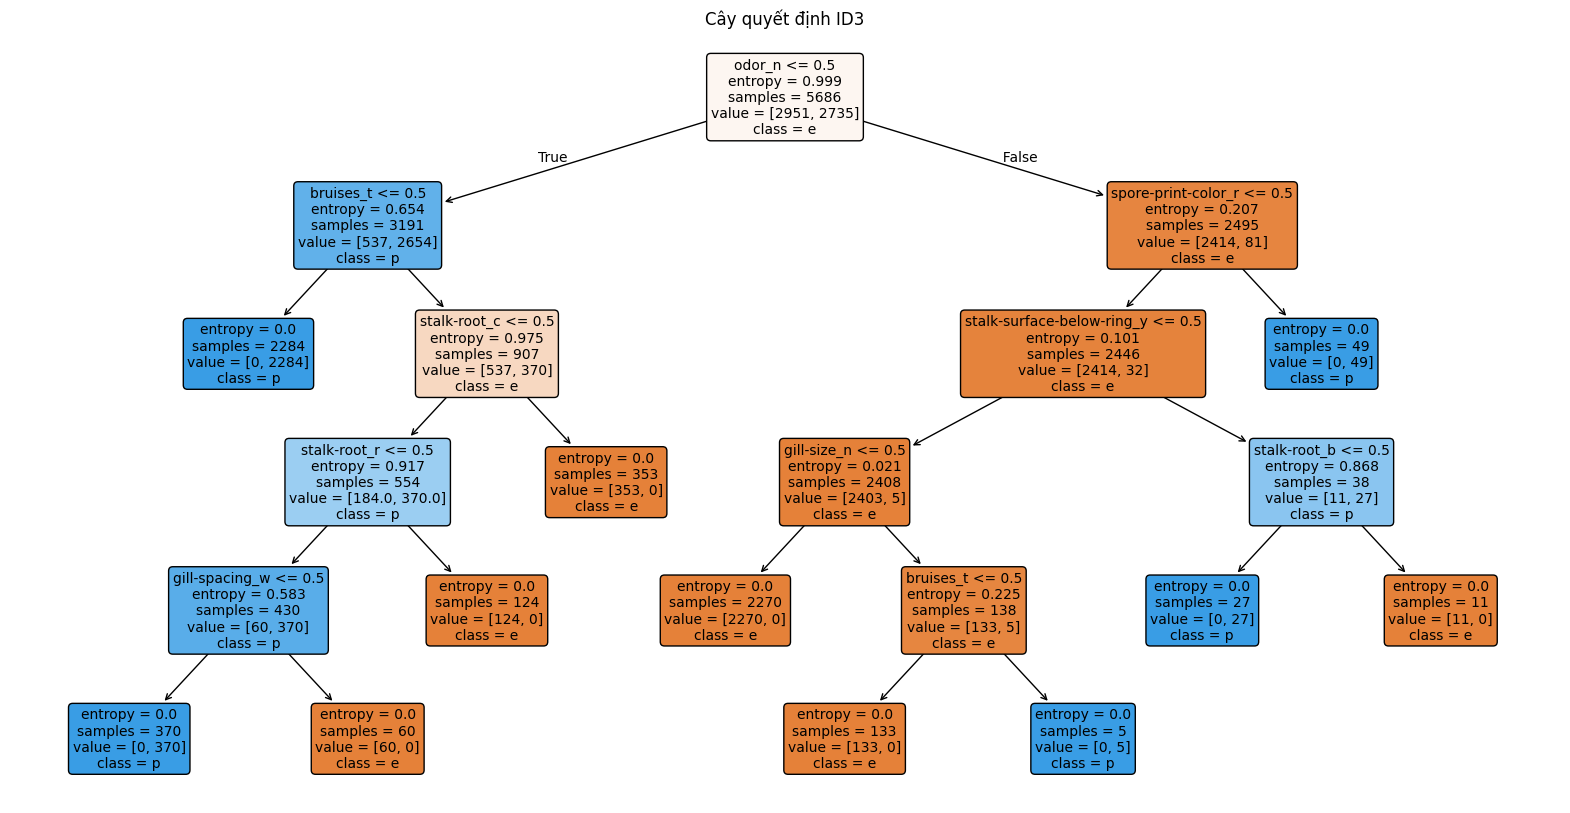

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# Khởi tạo cây ID3
id3_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Huấn luyện trên tập dữ liệu huấn luyện
id3_tree.fit(X_train, y_train)
# Dự đoán trên tập kiểm thử
y_pred = id3_tree.predict(X_test)

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("Trần Quân Bảo - 6351071005")
# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=id3_tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Ma trận nhầm lẫn")
plt.show()

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác trên tập kiểm thử:", round(accuracy, 4))
plt.figure(figsize=(20,10))
plot_tree(
    id3_tree,
    feature_names=X_encoded.columns,
    class_names=[str(cls) for cls in id3_tree.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Cây quyết định ID3")
plt.show()


Trần Quân Bảo - 6351071005


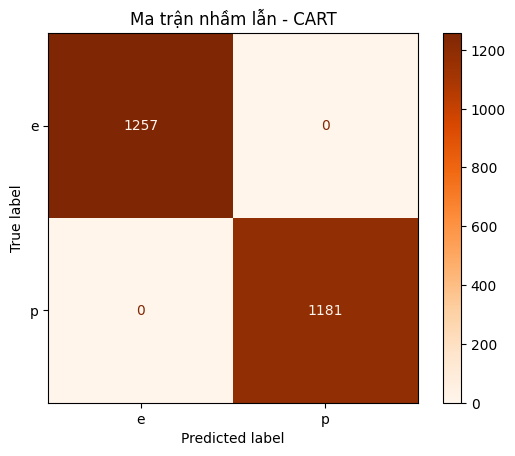

Độ chính xác trên tập kiểm thử (CART): 1.0


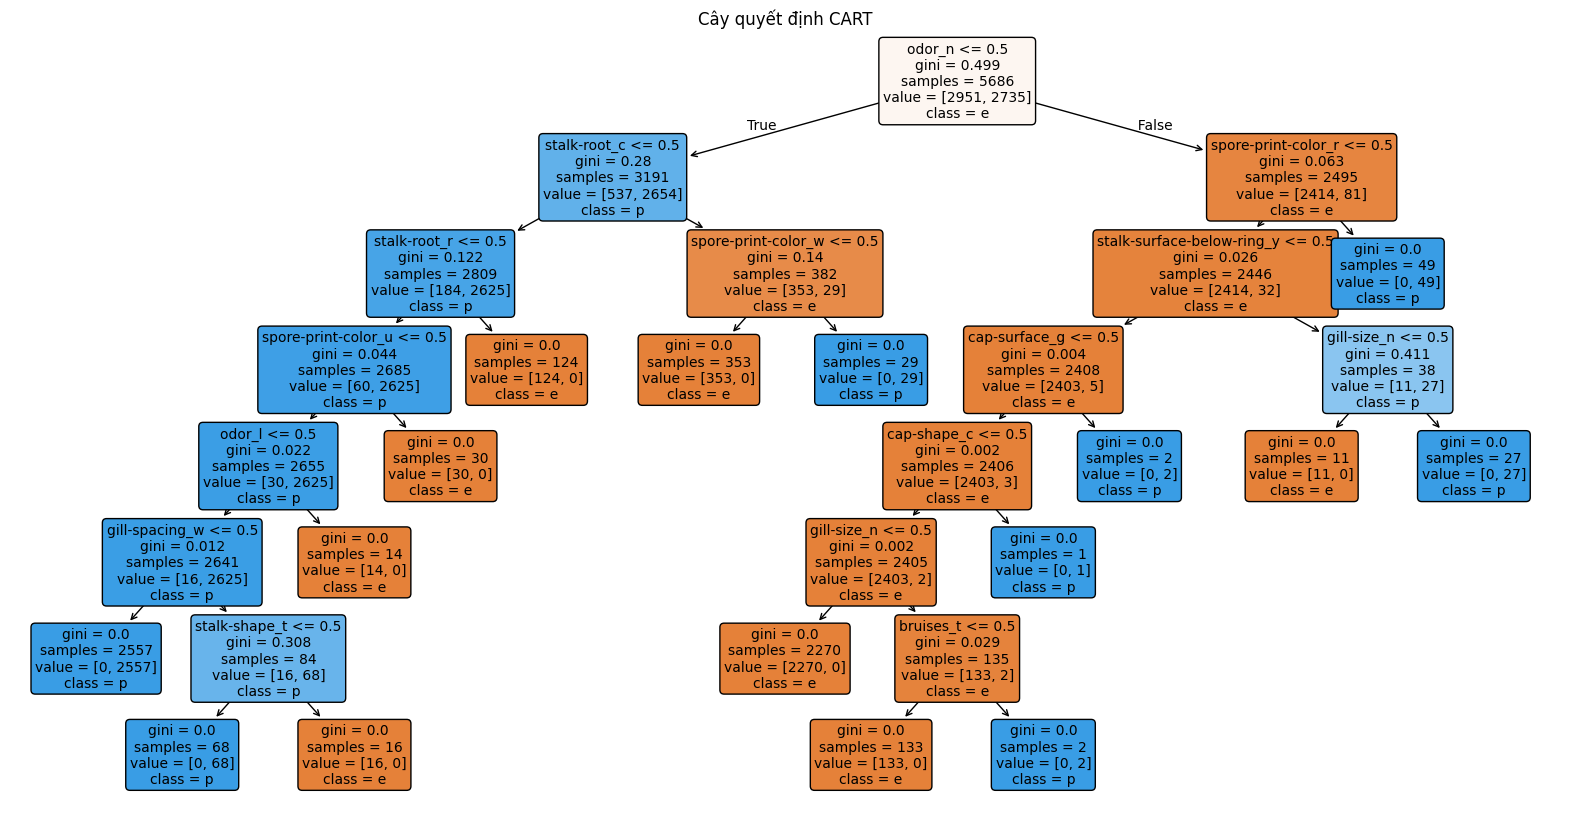

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# Khởi tạo cây CART
cart_tree = DecisionTreeClassifier(criterion='gini', random_state=42)

# Huấn luyện trên tập huấn luyện
cart_tree.fit(X_train, y_train)
# Dự đoán trên tập kiểm thử
y_pred_cart = cart_tree.predict(X_test)

# Tính ma trận nhầm lẫn
cm_cart = confusion_matrix(y_test, y_pred_cart)
print("Trần Quân Bảo - 6351071005")
# Hiển thị ma trận nhầm lẫn
disp_cart = ConfusionMatrixDisplay(confusion_matrix=cm_cart, display_labels=cart_tree.classes_)
disp_cart.plot(cmap=plt.cm.Oranges)
plt.title("Ma trận nhầm lẫn - CART")
plt.show()

# Tính độ chính xác
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print("Độ chính xác trên tập kiểm thử (CART):", round(accuracy_cart, 4))
plt.figure(figsize=(20,10))
plot_tree(
    cart_tree,
    feature_names=X_encoded.columns,
    class_names=[str(cls) for cls in cart_tree.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Cây quyết định CART")
plt.show()


Trần Quân Bảo - 6351071005


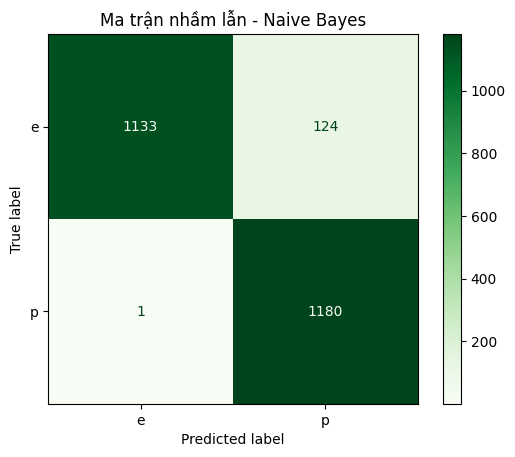

Độ chính xác trên tập kiểm thử (Naive Bayes): 0.9487


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# Khởi tạo mô hình Gaussian Naive Bayes
nb_model = GaussianNB()

# Huấn luyện trên tập huấn luyện
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Trần Quân Bảo - 6351071005")
# Ma trận nhầm lẫn
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
disp_nb.plot(cmap=plt.cm.Greens)
plt.title("Ma trận nhầm lẫn - Naive Bayes")
plt.show()

# Độ chính xác
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Độ chính xác trên tập kiểm thử (Naive Bayes):", round(accuracy_nb, 4))


ID3 và CART đều đạt độ chính xác tuyệt đối 1.0 trên tập kiểm thử, cho thấy cả hai mô hình cây quyết định hoàn toàn phân loại chính xác tất cả các mẫu.

Naïve Bayes cũng có độ chính xác rất cao (0.9487), nhưng thấp hơn một chút so với các cây quyết định.